## Credit Scoring Model

First few rows of the dataset:
   clientid       income        age         loan  default
0         1  66155.92510  59.017015  8106.532131        0
1         2  34415.15397  48.117153  6564.745018        0
2         3  57317.17006  63.108049  8020.953296        0
3         4  42709.53420  45.751972  6103.642260        0
4         5  66952.68885  18.584336  8770.099235        1

Column names in the dataset:
Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

Missing values in the dataset:
clientid    0
income      0
age         3
loan        0
default     0
dtype: int64
Model Accuracy: 0.94


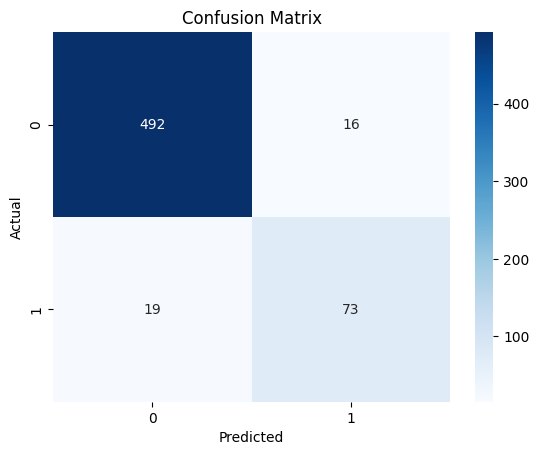

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       508
           1       0.82      0.79      0.81        92

    accuracy                           0.94       600
   macro avg       0.89      0.88      0.89       600
weighted avg       0.94      0.94      0.94       600



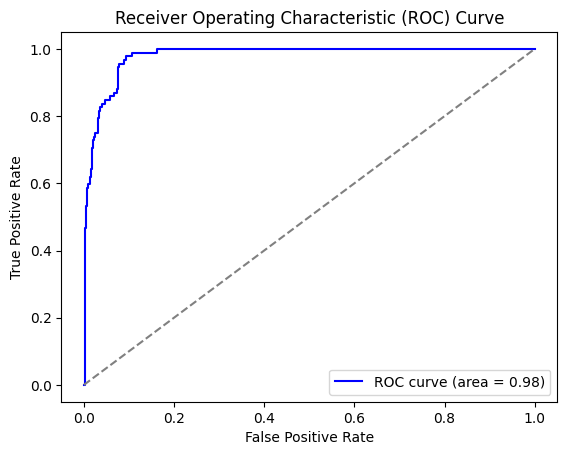

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('credit_data.csv')

# Display the first few rows and column names of the dataset
print("First few rows of the dataset:")
print(df.head())
print("\nColumn names in the dataset:")
print(df.columns)

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Fill missing values if any (example: fill with median)
df.fillna(df.median(), inplace=True)

# Define features (X) and target variable (y)
# 'default' is the target variable
X = df[['income', 'age', 'loan']]
y = df['default']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optionally, plot the ROC curve and calculate AUC score for further evaluation
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC curve and AUC score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
